# **Project Definition**

Prediction Of Heart Failure Risk Based On Clinical Data

# **Problem Statement**

Heart failure is a complex cardiovascular condition influenced by a combination of clinical measurements, lifestyle habits, and physiological indicators. Early identification of individuals at high risk is crucial to reduce mortality and improve treatment outcomes.

This project aims to develop a machine learning–based heart failure risk prediction system using a real-world clinical dataset containing patient demographics, vital signs, diagnostic test results, and lifestyle factors.
The model predicts whether a patient falls into a high-risk or low-risk heart failure category, enabling data-driven risk stratification and early clinical intervention.

# **Objectives**

* To analyze clinical, physiological, and lifestyle factors contributing to heart failure risk

* To preprocess a real-world medical dataset containing missing values, inconsistent labels, and mixed data types

* To perform exploratory data analysis to uncover patterns and relationships affecting heart failure risk

* To apply feature encoding, scaling, and outlier handling techniques

* To train and evaluate multiple machine learning classification models

* To identify the most effective model for heart failure risk prediction

* To perform inference on unseen patient data for real-world applicability










# **Dataset Description**

**Dataset Source** : ChatGPT
* The dataset used in this project is a synthetically generated heart failure dataset, created to simulate real-world clinical data.
* Synthetic data was used due to patient privacy regulations and data protection laws, while still allowing realistic preprocessing and analysis.

**Dataset Name** : heart_m

**Number of Records**: 3982 patient records

**Number of Features**: 15 input features + 1 target variable

**Target Variable**: heart_failure_risk

* high → High risk of heart failure

* low → Low risk of heart failure

**Dataset Characteristics**:

* Contains numerical and categorical features

* Includes missing values, inconsistent categorical labels, and non-standard entries

* Suitable for data preprocessing and machine learning tasks

# **Column Explanation**



**age**

* Age of the patient in years

* Typical range: 18 – 90 years

* Risk of heart disease generally increases with age


**sex**

* Gender of the patient (Male / Female)

* Used to study gender-based differences in heart conditions


**resting_bp (Resting Blood Pressure)**

* Blood pressure measured while the patient is at rest

* Normal range: 90 – 120 mm Hg

* High blood pressure: ≥ 140 mm Hg

* High values increase strain on the heart


**cholesterol**

* Cholesterol level in the blood

* Normal: < 200 mg/dL

* Borderline high: 200 – 239 mg/dL

* High: ≥ 240 mg/dL

* High cholesterol can block blood vessels


**fasting_blood_sugar**

* Indicates high blood sugar after fasting

* No: Normal: ≤ 120 mg/dL

* Yes: High: > 120 mg/dL

* High values may indicate diabetes risk


**exercise_angina**

* Chest pain during physical activity

* Yes: Indicates possible heart stress

* No: Normal condition


**oldpeak**

* Change in heart activity during exercise

* Normal: 0 – 1

* Concerning: > 2

* Higher values may indicate reduced blood flow to the heart


**num_major_vessels**

* Number of major blood vessels affected

* Normal: 0

* Range: 0 – 3

* Higher numbers indicate higher heart risk


**bmi (Body Mass Index)**

* Measure of body fat based on height and weight

* Underweight: < 18.5

* Normal: 18.5 – 24.9

* Overweight: 25 – 29.9

* Obese: ≥ 30

* Higher BMI increases heart disease risk


**diabetes**

* Indicates whether the patient has diabetes

* Yes: Blood sugar consistently high

* No: Normal blood sugar levels

* Diabetes increases heart failure risk


**chest_pain_type**

* Type of chest pain experienced

* Certain types are more strongly associated with heart disease than others


**rest_ecg**

* Heart electrical activity at rest

* Normal: No abnormal readings

* Abnormal: May indicate heart damage or stress


**slope**

* Change in heart activity during peak exercise

* Upsloping: Normal

* Flat or Downsloping: Higher heart disease risk


**thalassemia**

* Blood disorder affecting oxygen transport

* Normal: No disorder

* Abnormal: Reduced oxygen supply can affect heart function


**smoking_status**

* Smoking habit of the patient

* Never: Lowest risk

* Former: Moderate risk

* Current: Highest risk

* Smoking damages heart and blood vessels


**Target Feature**:
heart_failure_risk

**Final prediction output**

* high: High risk of heart failure

* low: Low risk of heart failure

# **Data Quality Issues Identified**

After analyzing the dataset, the following data quality issues were observed:

* Missing values in numerical features such as cholesterol and bmi

* Inconsistent categorical labels

  * sex contains values like M, Male, F, Female

  * Binary features contain mixed formats such as yes/no, Y/N, 0/1

* Non-numeric symbols such as ? present in numerical columns like num_major_vessels

* Outliers in numerical features such as resting_bp, cholesterol, and oldpeak

* Presence of mixed data types, requiring careful preprocessing before modeling

# **Data Cleaning Strategy**

To prepare the dataset for machine learning, the following preprocessing steps were applied:

* Standardize inconsistent categorical values into a uniform format

* Replace invalid symbols and incorrect entries with missing values

* Handle missing values using statistical methods such as median (numerical) and mode (categorical)

* Detect and cap extreme outliers to reduce their influence on model performance

* Encode categorical variables into numerical form

* Apply feature scaling to ensure uniform contribution of all features

## **Import Basic Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Upload and read the CSV file**

In [2]:
from google.colab import files
upload = files.upload()

Saving heart_failure.csv to heart_failure.csv


In [3]:
data = pd.read_csv("heart_failure.csv")
data.head()

,age,sex,resting_bp,cholesterol,fasting_blood_sugar,exercise_angina,oldpeak,num_major_vessels,bmi,diabetes,chest_pain_type,rest_ecg,slope,thalassemia,smoking_status,heart_failure_risk
0,68,M,160.2,242.3,no,N,3.68,3,NaN,0,non-anginal,ST-T abnormality,upsloping,normal,current,high
1,58,M,145.4,215.8,yes,no,2.06,0,30.9,yes,non-anginal,LV hypertrophy,flat,reversible defect,NaN,high
2,44,F,133.7,226.3,0,Y,2.87,1,NaN,0,non-anginal,normal,upsloping,normal,former,low
3,72,Male,145.7,156.6,no,no,1.17,?,21.3,yes,non-anginal,LV hypertrophy,flat,reversible defect,current,low
4,37,Female,132.2,NaN,no,no,0.55,?,NaN,0,non-anginal,normal,upsloping,fixed defect,current,low


## **Dataset Overview**

In [4]:
print("Dataset Overview:\n")

print("\nShape of dataset:\n",data.shape)
print("\nColumn Name:\n",data.columns)
print("\nInformation:\n")
print(data.info())
print("\nSummary statistics:\n",data.describe())

Dataset Overview:


Shape of dataset:
 (3982, 16)

Column Name:
 Index(['age', 'sex', 'resting_bp', 'cholesterol', 'fasting_blood_sugar',
       'exercise_angina', 'oldpeak', 'num_major_vessels', 'bmi', 'diabetes',
       'chest_pain_type', 'rest_ecg', 'slope', 'thalassemia', 'smoking_status',
       'heart_failure_risk'],
      dtype='object')

Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3982 entries, 0 to 3981
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  3982 non-null   int64  
 1   sex                  3982 non-null   object 
 2   resting_bp           3673 non-null   float64
 3   cholesterol          3518 non-null   float64
 4   fasting_blood_sugar  3711 non-null   object 
 5   exercise_angina      3713 non-null   object 
 6   oldpeak              3730 non-null   float64
 7   num_major_vessels    3982 non-null   object 
 8   bmi                  3589 

In [5]:
data.describe(include='all')

,age,sex,resting_bp,cholesterol,fasting_blood_sugar,exercise_angina,oldpeak,num_major_vessels,bmi,diabetes,chest_pain_type,rest_ecg,slope,thalassemia,smoking_status,heart_failure_risk
count,3982.000000,3982,3673.000000,3518.000000,3711,3713,3730.000000,3982,3589.000000,3737,3982,3982,3982,3794,3781,3982
unique,NaN,4,NaN,NaN,4,4,NaN,5,NaN,4,4,3,3,3,3,2
top,NaN,Male,NaN,NaN,no,Y,NaN,?,NaN,0,non-anginal,ST-T abnormality,downsloping,fixed defect,never,low
freq,NaN,1069,NaN,NaN,947,1050,NaN,884,NaN,1002,1051,1366,1358,1305,1275,2096
mean,56.297087,NaN,131.046501,244.410574,NaN,NaN,1.743603,NaN,27.092059,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,14.261310,NaN,15.536902,41.712597,NaN,NaN,1.050750,NaN,3.910046,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,30.000000,NaN,82.300000,86.500000,NaN,NaN,0.000000,NaN,9.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,44.000000,NaN,120.900000,215.800000,NaN,NaN,0.880000,NaN,24.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,58.000000,NaN,131.200000,245.700000,NaN,NaN,1.690000,NaN,27.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,68.000000,NaN,141.900000,273.075000,NaN,NaN,2.470000,NaN,29.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Handling Missing Values**

Checking Missing Values

1. Check if any value is missing

In [13]:
df = data.copy()
df.isnull().any()

,0
age,False
sex,False
resting_bp,True
cholesterol,True
fasting_blood_sugar,True
exercise_angina,True
oldpeak,True
num_major_vessels,False
bmi,True
diabetes,True


2. Count missing values per column

In [14]:
df.isnull().sum()

,0
age,0
sex,0
resting_bp,309
cholesterol,464
fasting_blood_sugar,271
exercise_angina,269
oldpeak,252
num_major_vessels,0
bmi,393
diabetes,245


3. Check total missing values in dataset

In [15]:
df.isnull().sum().sum()

np.int64(2592)

4. Clean the data

In [16]:
df['sex'] = df['sex'].replace({
    'M': 'male',
    'F': 'female',
    'male': 'male',
    'female': 'female',
    'Male': 'male',
    'Female': 'female'
})

df['fasting_blood_sugar'] = df['fasting_blood_sugar'].replace({
    '1': 'yes',
    '0': 'no'
})

df['diabetes'] = df['diabetes'].replace({
    '1': 'yes',
    '0': 'no'
})

df['exercise_angina'] = df['exercise_angina'].replace({
    'Y': 'yes',
    'N': 'no'
})

In [17]:
df.replace(['nan','NaN', 'NULL', 'null', 'None', 'none', '?', '', 'unknown'], np.nan, inplace=True)

numeric_cols = [
    'age', 'resting_bp', 'cholesterol',
    'oldpeak', 'num_major_vessels', 'bmi'
]

df[numeric_cols] = df[numeric_cols].astype(float)

## **Fill Missing Values (Mean/Median/Mode)**

In [18]:
# With Median
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

# With Mode
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


/tmp/ipython-input-3175616770.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-3175616770.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [19]:
df.isnull().sum().sum()

np.int64(0)

**Method Justification**

Missing values can negatively impact model performance and may cause errors during training and prediction. Therefore, the **fillna method** was used to ensure a complete and consistent dataset, allowing the machine learning model to learn meaningful patterns without data loss caused by row deletion.

For **numerical features**, the **median** was used for imputation because it is robust to outliers and skewed distributions, which are common in medical data such as cholesterol levels, blood pressure, and heart rate. Using the median preserves the central tendency of the data without being influenced by extreme values.

For **categorical features**, the **mode** was used because it represents the most frequently occurring category and maintains the original data distribution. Mode imputation is simple, interpretable, and effective for categorical variables where numerical averaging is not meaningful.

Overall, this approach ensures data integrity while minimizing bias and maintaining realistic feature distributions, making it suitable for clinical datasets.

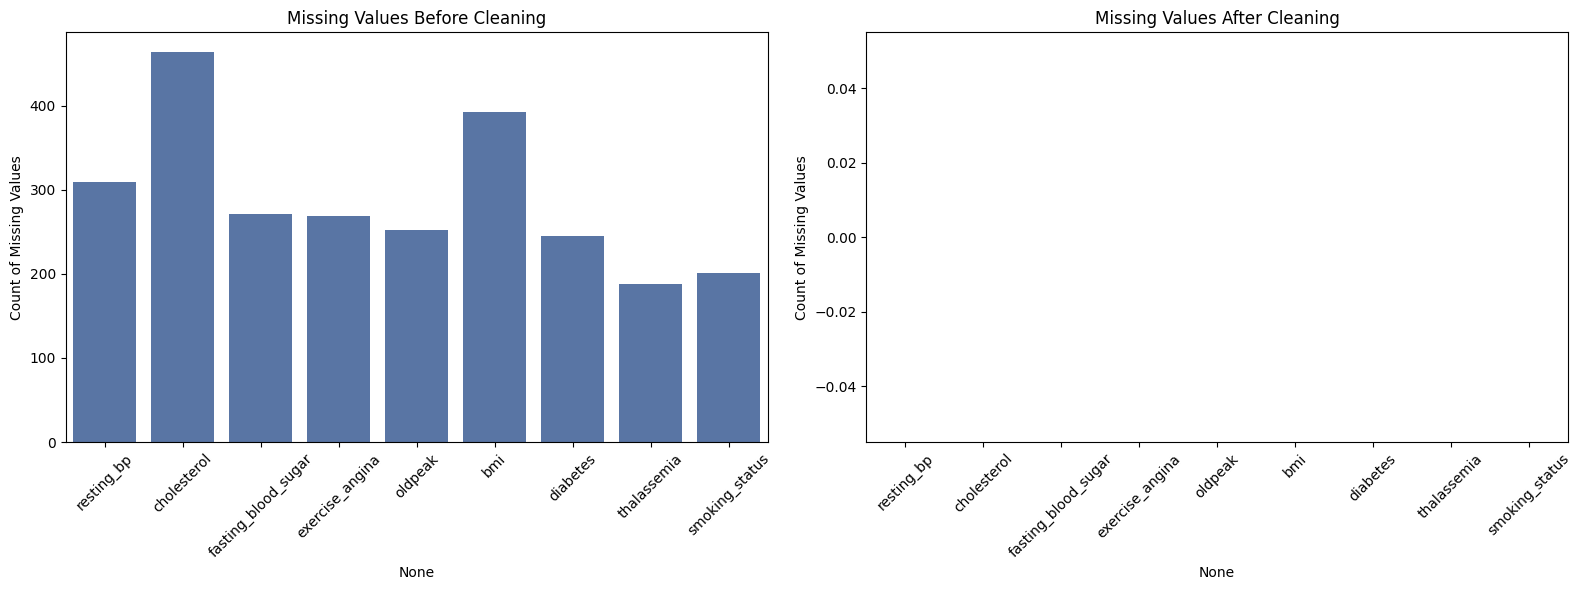

In [20]:
missing_before = data.isnull().sum()
missing_after = df.isnull().sum()

# Keep only columns that originally had missing values
missing_cols = missing_before[missing_before > 0].index

missing_before = missing_before[missing_cols]
missing_after = missing_after[missing_cols]

# Create side-by-side plots
plt.figure(figsize=(16, 6))

# Before cleaning
plt.subplot(1, 2, 1)
sns.barplot(
    x=missing_before.index,
    y=missing_before.values,
    color='#4C72B0'
)
plt.title("Missing Values Before Cleaning")
plt.xticks(rotation=45)
plt.ylabel("Count of Missing Values")

# After cleaning
plt.subplot(1, 2, 2)
sns.barplot(
    x=missing_after.index,
    y=missing_after.values
)
plt.title("Missing Values After Cleaning")
plt.xticks(rotation=45)
plt.ylabel("Count of Missing Values")

plt.tight_layout()
plt.show()


In [21]:
df.head(10)

,age,sex,resting_bp,cholesterol,fasting_blood_sugar,exercise_angina,oldpeak,num_major_vessels,bmi,diabetes,chest_pain_type,rest_ecg,slope,thalassemia,smoking_status,heart_failure_risk
0,68.0,male,160.2,242.3,no,no,3.68,3.0,27.1,no,non-anginal,ST-T abnormality,upsloping,normal,current,high
1,58.0,male,145.4,215.8,yes,no,2.06,0.0,30.9,yes,non-anginal,LV hypertrophy,flat,reversible defect,never,high
2,44.0,female,133.7,226.3,no,yes,2.87,1.0,27.1,no,non-anginal,normal,upsloping,normal,former,low
3,72.0,male,145.7,156.6,no,no,1.17,2.0,21.3,yes,non-anginal,LV hypertrophy,flat,reversible defect,current,low
4,37.0,female,132.2,245.7,no,no,0.55,2.0,27.1,no,non-anginal,normal,upsloping,fixed defect,current,low
5,50.0,male,130.4,252.0,no,yes,0.94,0.0,28.3,yes,atypical,ST-T abnormality,upsloping,fixed defect,never,low
6,68.0,female,124.7,209.1,no,no,1.22,3.0,23.5,no,typical,ST-T abnormality,upsloping,fixed defect,never,low
7,48.0,male,153.5,315.9,no,no,0.91,0.0,28.4,no,non-anginal,normal,upsloping,fixed defect,never,low
8,52.0,female,117.7,245.7,no,yes,1.56,3.0,29.7,yes,atypical,normal,flat,fixed defect,former,low
9,40.0,female,153.0,198.6,yes,no,1.96,1.0,26.2,yes,atypical,LV hypertrophy,flat,fixed defect,current,low


In [22]:
for col in ['sex', 'fasting_blood_sugar', 'exercise_angina', 'diabetes', 'slope','smoking_status','chest_pain_type','rest_ecg','thalassemia']:
    print(col, ":", df[col].unique())


sex : ['male' 'female']
fasting_blood_sugar : ['no' 'yes']
exercise_angina : ['no' 'yes']
diabetes : ['no' 'yes']
slope : ['upsloping' 'flat' 'downsloping']
smoking_status : ['current' 'never' 'former']
chest_pain_type : ['non-anginal' 'atypical' 'typical' 'asymptomatic']
rest_ecg : ['ST-T abnormality' 'LV hypertrophy' 'normal']
thalassemia : ['normal' 'reversible defect' 'fixed defect']


# **EDA**

Univariate Analysis

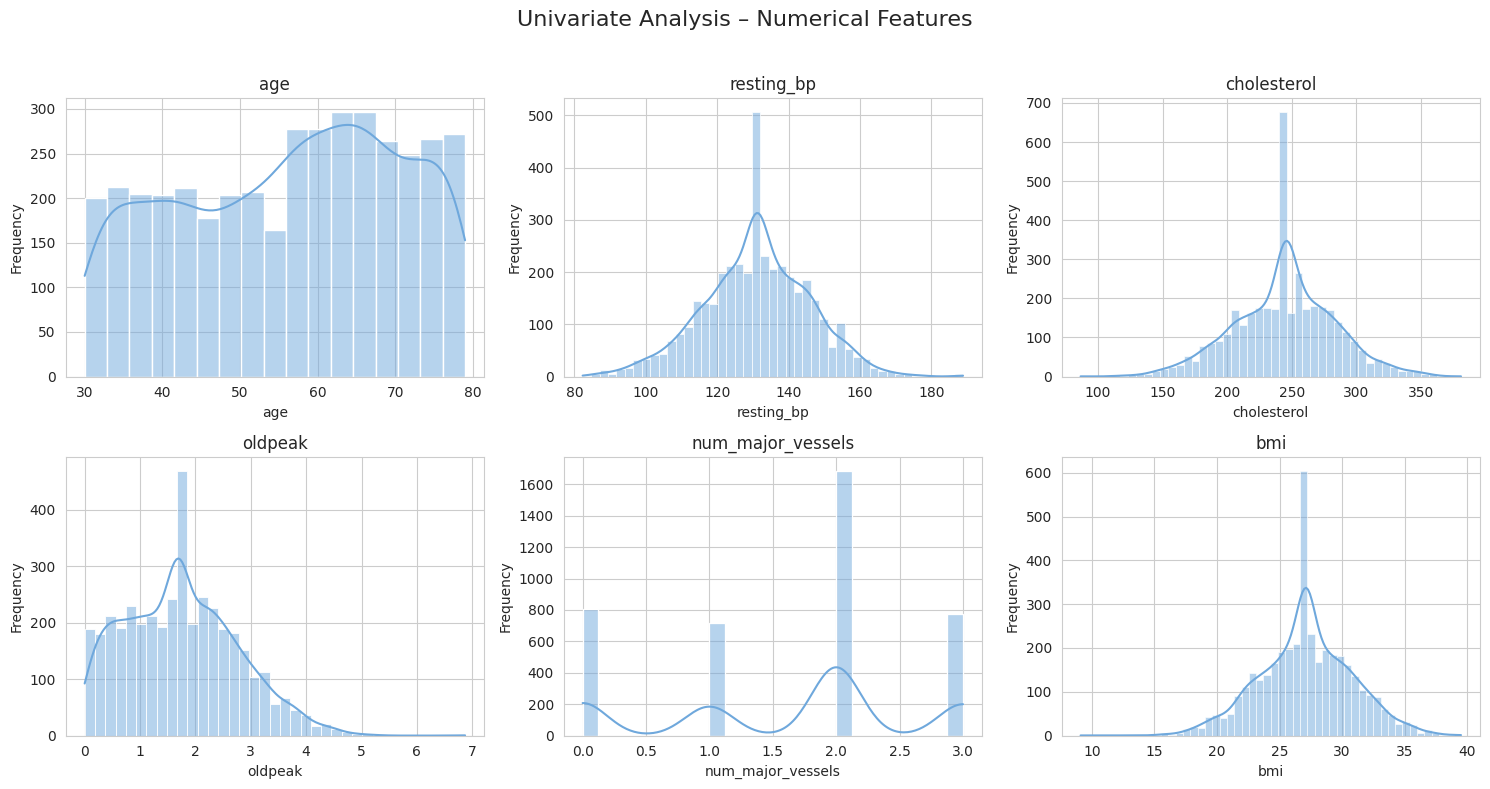

/tmp/ipython-input-1917414812.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-1917414812.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-1917414812.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-1917414812.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-1917414812.py:41: FutureWarning: 

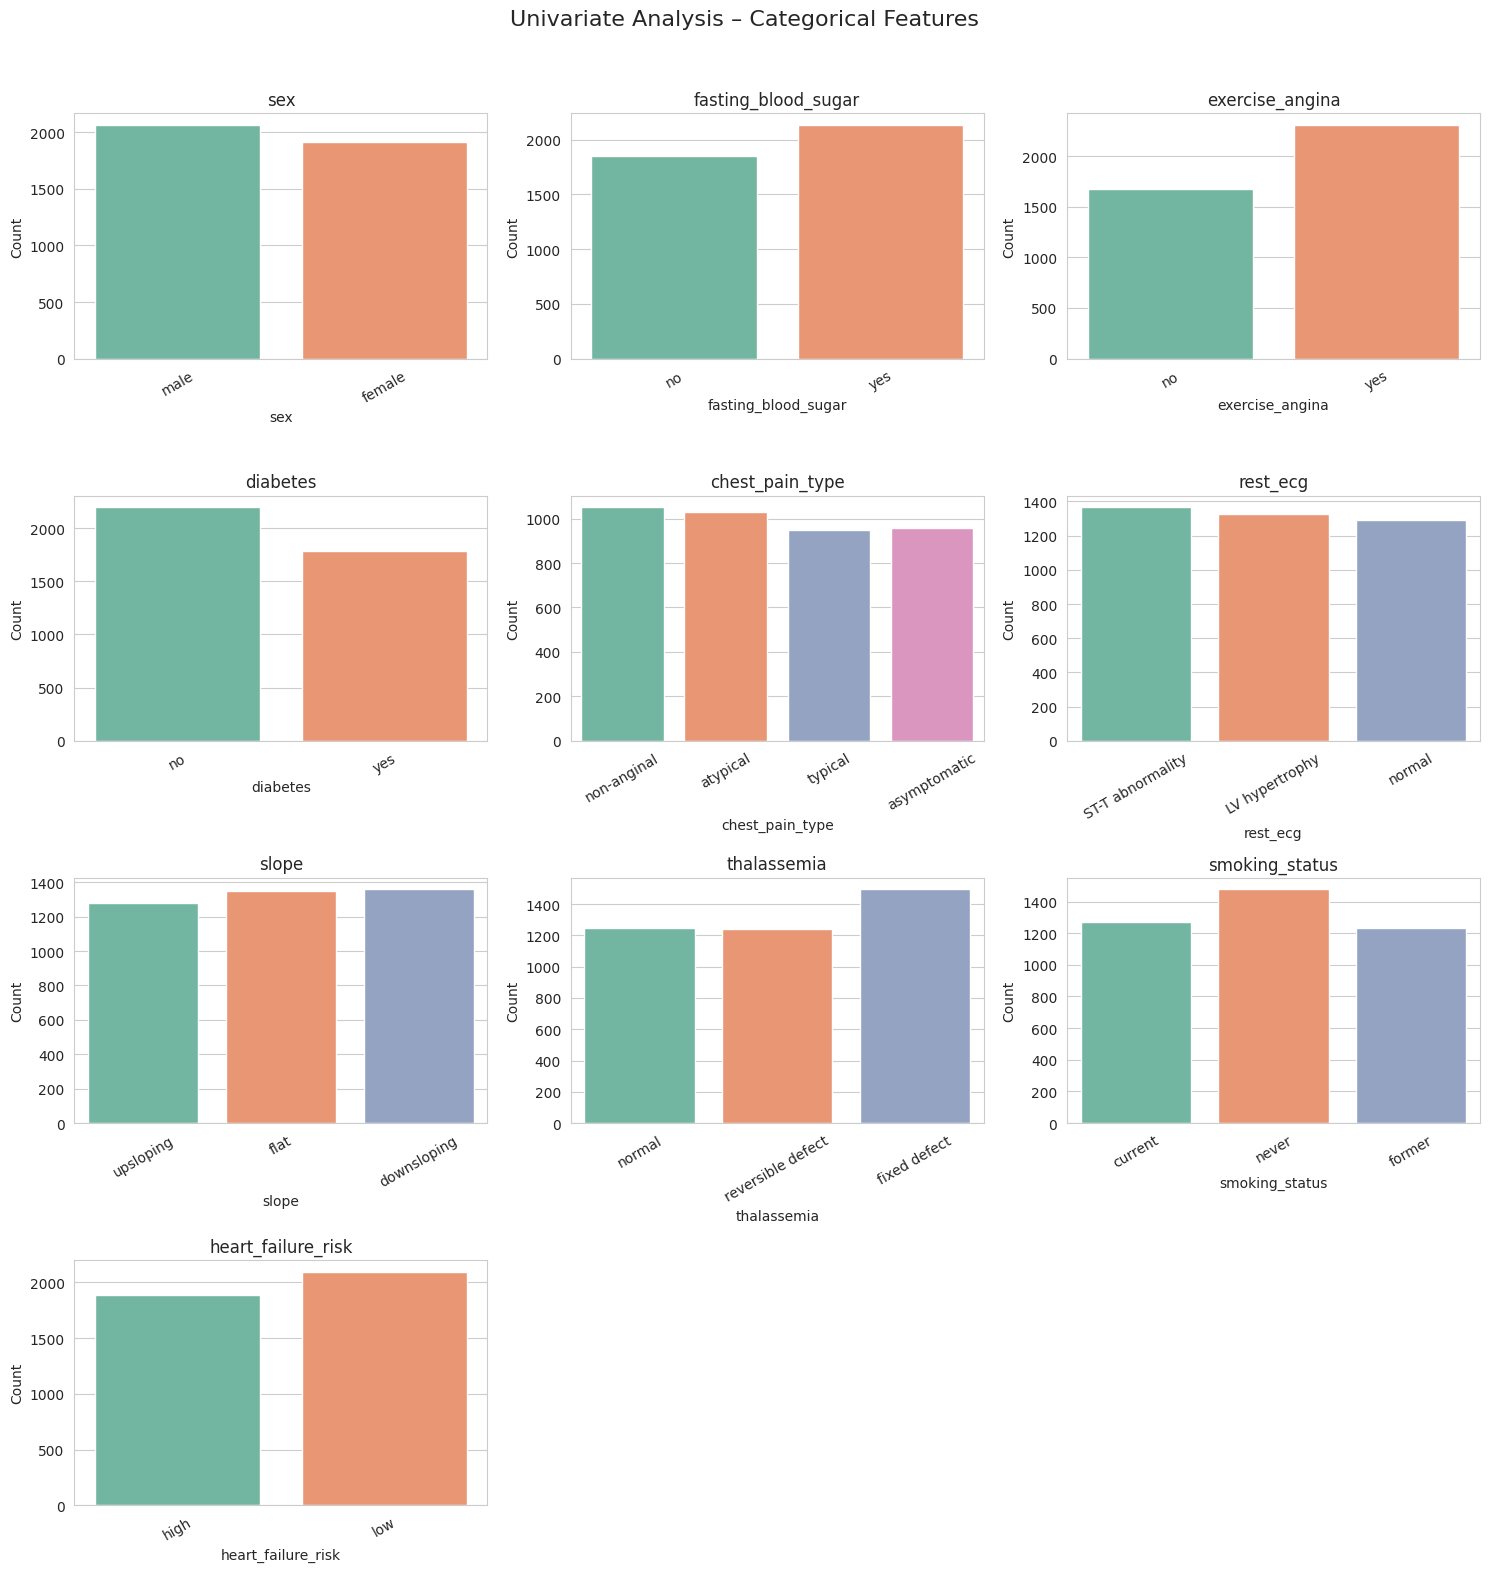

In [23]:
import math

sns.set_style("whitegrid")

# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include='object').columns

# Numerical Features (Histograms)
n = len(numerical_cols)
cols = 3
rows = math.ceil(n / cols)

plt.figure(figsize=(cols * 5, rows * 4))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(
        df[col],
        kde=True,
        color='#6FA8DC'
    )
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.suptitle('Univariate Analysis – Numerical Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# Categorical Features (Count Plots)
n = len(categorical_cols)
cols = 3
rows = math.ceil(n / cols)

plt.figure(figsize=(cols * 5, rows * 4))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(rows, cols, i)
    sns.countplot(
        x=df[col],
        palette='Set2'
    )
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=30)

plt.suptitle('Univariate Analysis – Categorical Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# **Insights**

**Numerical Features**

* **Age**:
The age distribution is fairly spread across middle-aged and elderly groups, indicating that heart failure risk is analyzed across a broad adult population rather than being limited to extreme age groups.

* **Resting Blood Pressure**:
Most observations are concentrated around moderate to high blood pressure values, suggesting that elevated blood pressure is common in the dataset and may play a significant role in heart failure risk.

* **Cholesterol**:
Cholesterol levels show a right-skewed distribution, with a noticeable number of individuals having high cholesterol values. This indicates the presence of potential cardiovascular risk factors within the population.


* **Oldpeak**:
The distribution of oldpeak is positively skewed, with most values concentrated at lower levels and fewer extreme values. This suggests that while severe ST depression is less frequent, it may be a strong indicator of heart failure risk when present.

* **Number of Major Vessels**:
The data shows discrete peaks, reflecting the categorical nature of this feature. Higher counts of affected vessels are less frequent but clinically significant.

* **BMI**:
BMI values are mostly concentrated in the overweight range, indicating that excess body weight is common in the dataset and may contribute to cardiovascular risk.


**Categorical Features**

* **Sex**:
The dataset contains a fairly balanced distribution between male and female patients, reducing gender-related bias in model training.

* **Fasting Blood Sugar & Diabetes**:
A substantial portion of patients exhibit elevated fasting blood sugar and diabetes, highlighting metabolic conditions as important contributing factors.

* **Exercise Angina**:
The presence of exercise-induced angina in a significant subset of patients suggests its relevance as a predictor of heart-related complications.

* **Chest Pain Type**:
All chest pain categories are well represented, indicating diversity in clinical presentation and the need for the model to learn complex patterns rather than relying on a single symptom.

* **Rest ECG**:
Both normal and abnormal ECG findings appear frequently, reinforcing the importance of ECG-related features in risk prediction.

* **Slope**:
The distribution across slope categories suggests varying degrees of exercise-induced ECG response, which aligns with its ordinal and clinical significance.

* **Thalassemia**:
The presence of different thalassemia types indicates underlying cardiac structural variations that may influence risk.

* **Smoking Status**:
The dataset includes current, former, and non-smokers in meaningful proportions, emphasizing lifestyle factors in heart failure risk assessment.


**Target Variable (Heart Failure Risk)**

* **Heart Failure Risk**:
The target variable shows a higher proportion of low-risk cases compared to high-risk cases, reflecting a realistic medical scenario. This moderate class imbalance highlights the importance of probability-based prediction and appropriate evaluation metrics rather than relying solely on accuracy.

Bivariate Analysis

/tmp/ipython-input-2066179662.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-2066179662.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


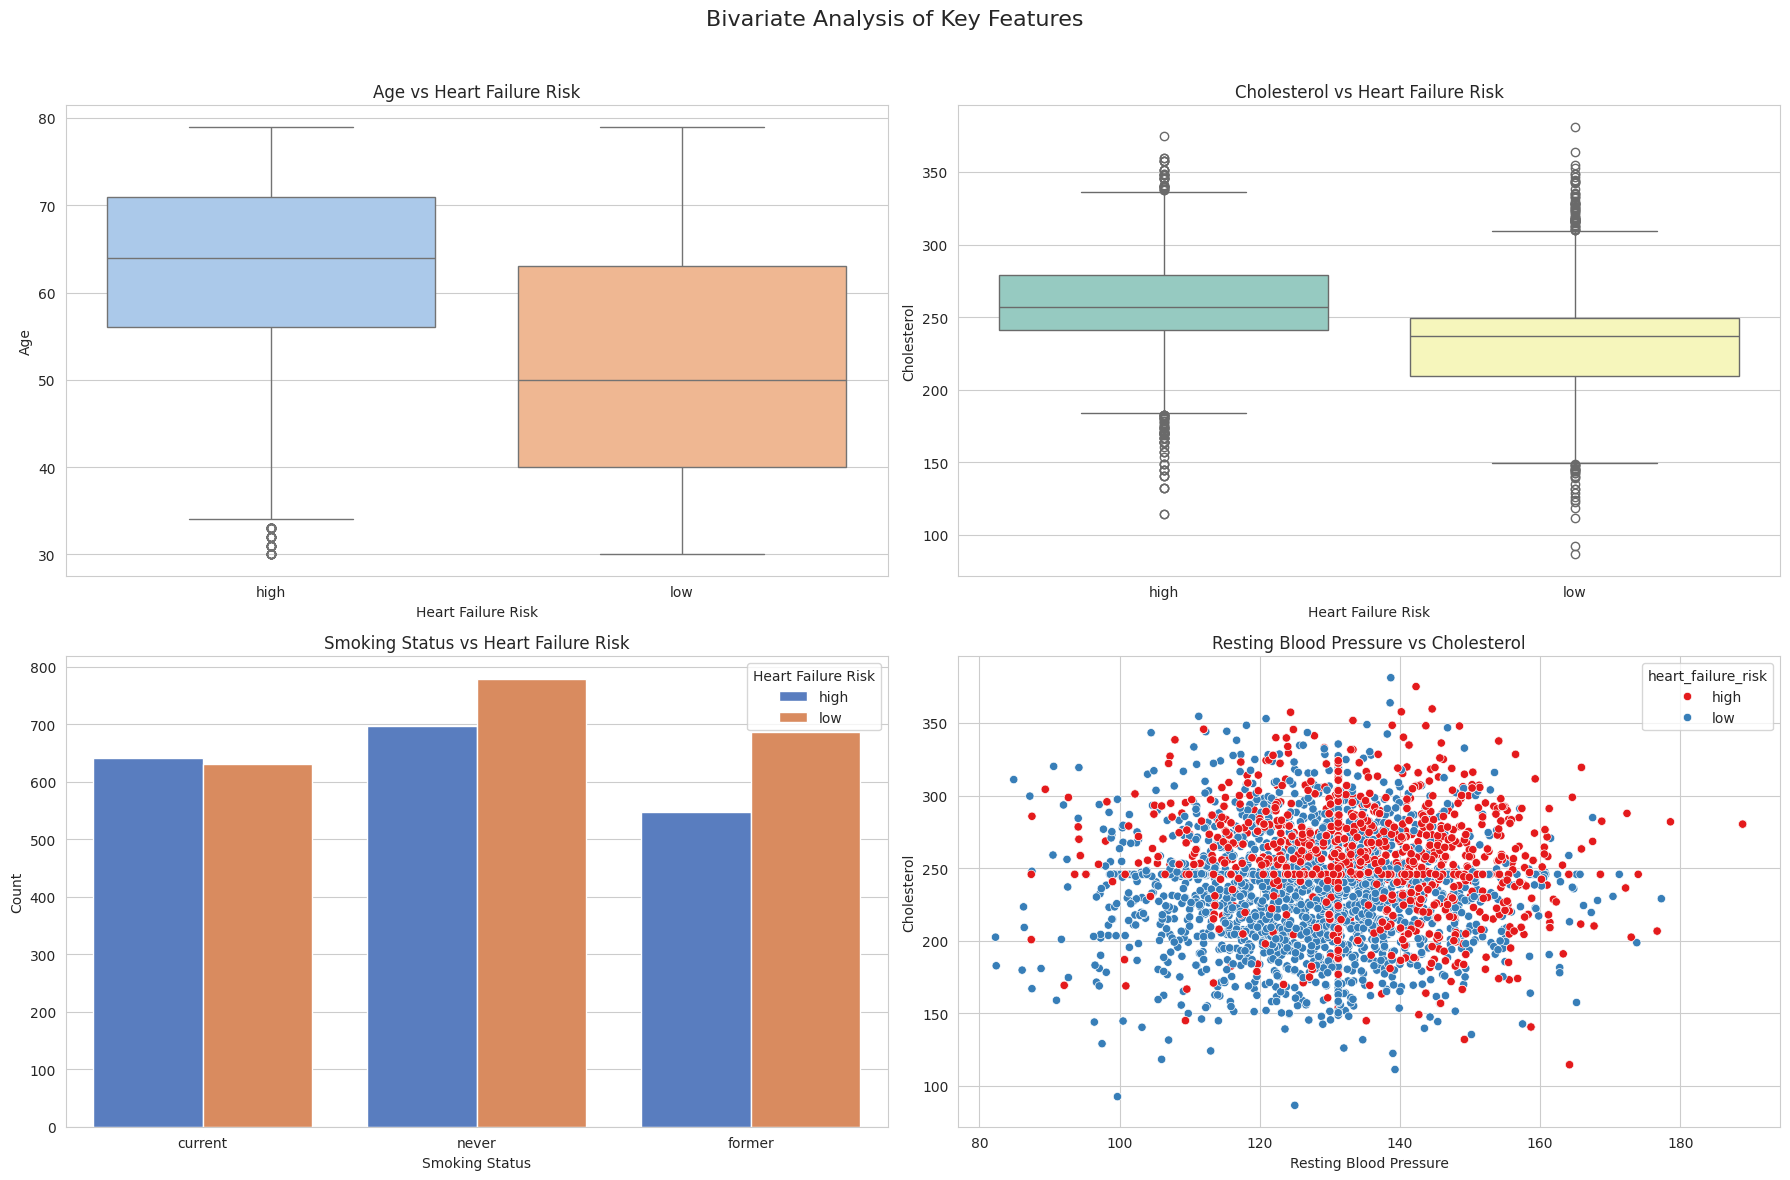

In [24]:
sns.set_style("whitegrid")

plt.figure(figsize=(18, 12))

# Numerical vs Target — Age vs Heart Failure Risk
plt.subplot(2, 2, 1)
sns.boxplot(
    x='heart_failure_risk',
    y='age',
    data=df,
    palette='pastel'
)
plt.title('Age vs Heart Failure Risk')
plt.xlabel('Heart Failure Risk')
plt.ylabel('Age')

# Numerical vs Target — Cholesterol vs Heart Failure Risk
plt.subplot(2, 2, 2)
sns.boxplot(
    x='heart_failure_risk',
    y='cholesterol',
    data=df,
    palette='Set3'
)
plt.title('Cholesterol vs Heart Failure Risk')
plt.xlabel('Heart Failure Risk')
plt.ylabel('Cholesterol')

# Categorical vs Target — Smoking Status vs Heart Failure Risk
plt.subplot(2, 2, 3)
sns.countplot(
    x='smoking_status',
    hue='heart_failure_risk',
    data=df,
    palette='muted'
)
plt.title('Smoking Status vs Heart Failure Risk')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.legend(title='Heart Failure Risk')

# Numerical vs Numerical — Resting BP vs Cholesterol
plt.subplot(2, 2, 4)
sns.scatterplot(
    x='resting_bp',
    y='cholesterol',
    hue='heart_failure_risk',
    data=df,
    palette='Set1'
)
plt.title('Resting Blood Pressure vs Cholesterol')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Cholesterol')

plt.suptitle('Bivariate Analysis of Key Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# **Insights**

* **Age vs Heart Failure Risk**:
Patients in the high-risk category tend to be older on average, indicating that heart failure risk increases with age.

* **Cholesterol vs Heart Failure Risk**:
Higher cholesterol levels are more frequently associated with the high-risk group, although some overlap exists, suggesting cholesterol alone is not sufficient but remains an important risk factor.

* **Smoking Status vs Heart Failure Risk**:
Current and former smokers show a higher proportion of high-risk cases compared to non-smokers, reinforcing smoking as a significant lifestyle-related risk factor.

* **Resting Blood Pressure vs Cholesterol**:
The scatter plot shows a weak to moderate positive relationship between resting blood pressure and cholesterol. High-risk patients are more densely clustered in regions with elevated values of both features, indicating their combined influence on heart failure risk.

# Multivariate Analysis

* Heat Map




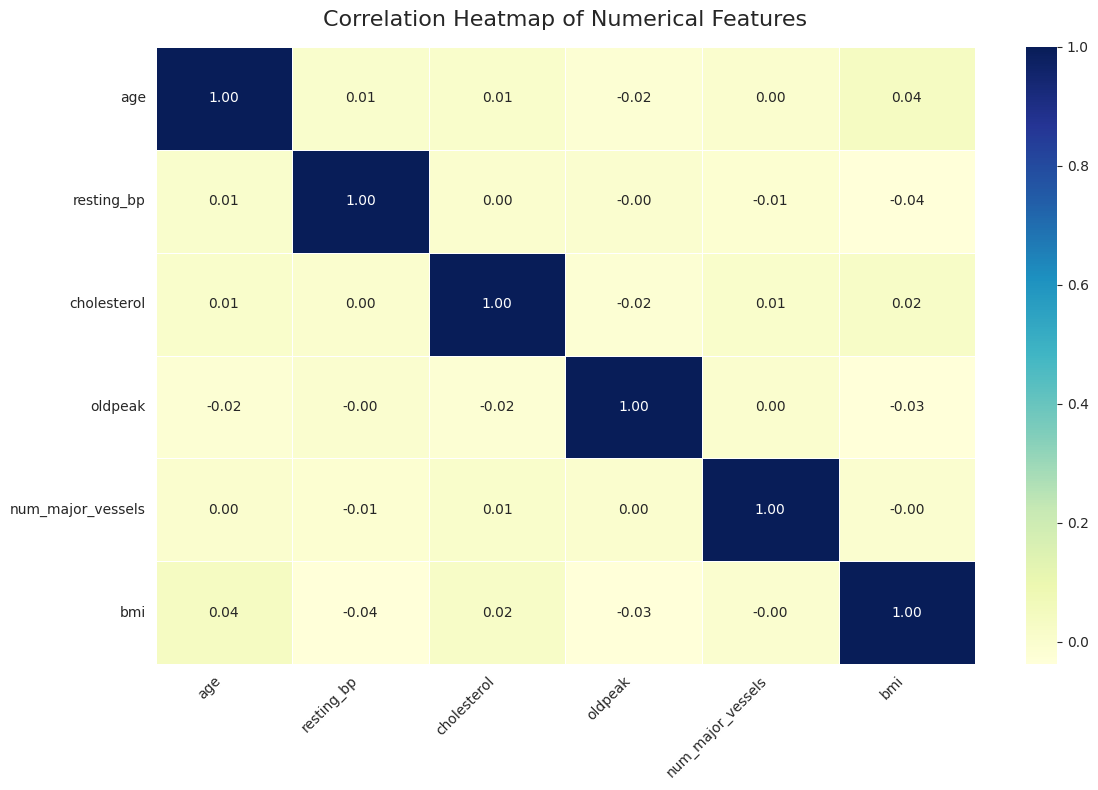

In [25]:
# Select only numerical columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Handle any remaining missing values safely
numeric_df = numeric_df.fillna(numeric_df.median())

# Correlation matrix
corr = numeric_df.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    linewidths=0.5,
    linecolor='white',
    cbar=True
)

plt.title(
    "Correlation Heatmap of Numerical Features",
    fontsize=16,
    pad=15
)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()


# **Insights**

**Correlation Values Meaning**

Correlation = **+1**
Indicates a perfect positive linear relationship. As one variable increases, the other increases proportionally.

Correlation = **−1**
Indicates a perfect negative linear relationship. As one variable increases, the other decreases proportionally.

Correlation = **0**
Indicates no linear relationship between the two variables. Changes in one variable do not linearly affect the other.


* **Very low correlations across features**:
All numerical features show correlation values close to 0, indicating the absence of strong linear relationships between variables.

* **Minimal multicollinearity**:
Since no feature pair shows high positive or negative correlation, there is little redundancy in the data. This improves model stability and reduces the risk of biased learning.

* **Independent contribution of features**:
Features such as age, resting blood pressure, cholesterol and BMI  provide largely independent information, allowing the model to learn from each variable separately.

* **Lack of linear dependency**:
The weak correlations suggest that heart failure risk is not driven by simple linear relationships between numerical features, but rather by complex, non-linear interactions.

* **Model selection support**:
The heatmap justifies the use of XGBoost, as tree-based models are well-suited to capture non-linear patterns and interactions that correlation analysis cannot reveal.

# **Outlier handling**

In [26]:
df_before_outliers = df.copy()

### IQR Method

In [27]:
# Numerical columns to check for outliers
numeric_cols = [
    'age',
    'resting_bp',
    'cholesterol',
    'oldpeak',
    'bmi'
]

print("OUTLIER DETECTION USING IQR METHOD\n")

for col in numeric_cols:
    # Ensure column is numeric
    temp = pd.to_numeric(df[col], errors='coerce')

    Q1 = temp.quantile(0.25)
    Q3 = temp.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_count = ((temp < lower_bound) | (temp > upper_bound)).sum()

    print(f"Column: {col}")
    print(f"Q1: {Q1}")
    print(f"Q3: {Q3}")
    print(f"IQR: {IQR}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Outliers Detected: {outlier_count}")
    print("-" * 50)


OUTLIER DETECTION USING IQR METHOD

Column: age
Q1: 44.0
Q3: 68.0
IQR: 24.0
Lower Bound: 8.0
Upper Bound: 104.0
Outliers Detected: 0
--------------------------------------------------
Column: resting_bp
Q1: 121.9
Q3: 141.0
IQR: 19.099999999999994
Lower Bound: 93.25000000000001
Upper Bound: 169.64999999999998
Outliers Detected: 49
--------------------------------------------------
Column: cholesterol
Q1: 219.82500000000002
Q3: 269.4
IQR: 49.57499999999996
Lower Bound: 145.4625000000001
Upper Bound: 343.76249999999993
Outliers Detected: 66
--------------------------------------------------
Column: oldpeak
Q1: 0.92
Q3: 2.42
IQR: 1.5
Lower Bound: -1.33
Upper Bound: 4.67
Outliers Detected: 12
--------------------------------------------------
Column: bmi
Q1: 24.8
Q3: 29.5
IQR: 4.699999999999999
Lower Bound: 17.75
Upper Bound: 36.55
Outliers Detected: 52
--------------------------------------------------


### Z-Score Method

In [28]:
numeric_cols = [
    'age',
    'resting_bp',
    'cholesterol',
    'oldpeak',
    'bmi'
]

# Z-score function
def zscore_series(series: pd.Series):
    series = series.dropna()
    return (series - series.mean()) / series.std(ddof=0)

# Outlier detection using Z-score
for col in numeric_cols:
    z_scores = zscore_series(df[col])
    outlier_count = (np.abs(z_scores) > 3).sum()

    print(f"{col}")
    print(f"Z-score Outliers (|z| > 3): {outlier_count}")
    print("-" * 40)


age
Z-score Outliers (|z| > 3): 0
----------------------------------------
resting_bp
Z-score Outliers (|z| > 3): 13
----------------------------------------
cholesterol
Z-score Outliers (|z| > 3): 12
----------------------------------------
oldpeak
Z-score Outliers (|z| > 3): 8
----------------------------------------
bmi
Z-score Outliers (|z| > 3): 12
----------------------------------------


### Compare outliers from both methods

In [29]:
numeric_cols = [
    'age',
    'resting_bp',
    'cholesterol',
    'oldpeak',
    'bmi'
]

outlier_summary = []

# Z-score function
def zscore_series(series: pd.Series):
    series = series.dropna()
    return (series - series.mean()) / series.std(ddof=0)

for col in numeric_cols:
    temp = pd.to_numeric(df[col], errors='coerce').dropna()

    # ---------- IQR METHOD ----------
    Q1 = temp.quantile(0.25)
    Q3 = temp.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    iqr_outliers = ((temp < lower_bound) | (temp > upper_bound)).sum()

    # ---------- Z-SCORE METHOD ----------
    z_scores = zscore_series(temp)
    zscore_outliers = (np.abs(z_scores) > 3).sum()

    # Store results
    outlier_summary.append({
        "Feature": col,
        "IQR_Outliers": iqr_outliers,
        "ZScore_Outliers": zscore_outliers
    })

# Create comparison DataFrame
outlier_comparison_df = pd.DataFrame(outlier_summary)

outlier_comparison_df


,Feature,IQR_Outliers,ZScore_Outliers
0,age,0,0
1,resting_bp,49,13
2,cholesterol,66,12
3,oldpeak,12,8
4,bmi,52,12


## Clearing The Outliers

In [30]:
# Numerical columns for outlier handling
numeric_cols = [
    'age',
    'resting_bp',
    'cholesterol',
    'oldpeak',
    'bmi'
]

print("OUTLIER HANDLING USING IQR CAPPING\n")

for col in numeric_cols:
    # Ensure numeric conversion
    temp = pd.to_numeric(df[col], errors='coerce')

    Q1 = temp.quantile(0.25)
    Q3 = temp.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers before handling
    outliers_before = ((temp < lower_bound) | (temp > upper_bound)).sum()

    # Apply capping (not removal)
    df[col] = np.clip(temp, lower_bound, upper_bound)

    # Count outliers after handling
    outliers_after = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()

    print(f"Column: {col}")
    print(f"Q1: {Q1}")
    print(f"Q3: {Q3}")
    print(f"IQR: {IQR}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Outliers Before Handling: {outliers_before}")
    print(f"Outliers After Handling: {outliers_after}")
    print("-" * 50)


OUTLIER HANDLING USING IQR CAPPING

Column: age
Q1: 44.0
Q3: 68.0
IQR: 24.0
Lower Bound: 8.0
Upper Bound: 104.0
Outliers Before Handling: 0
Outliers After Handling: 0
--------------------------------------------------
Column: resting_bp
Q1: 121.9
Q3: 141.0
IQR: 19.099999999999994
Lower Bound: 93.25000000000001
Upper Bound: 169.64999999999998
Outliers Before Handling: 49
Outliers After Handling: 0
--------------------------------------------------
Column: cholesterol
Q1: 219.82500000000002
Q3: 269.4
IQR: 49.57499999999996
Lower Bound: 145.4625000000001
Upper Bound: 343.76249999999993
Outliers Before Handling: 66
Outliers After Handling: 0
--------------------------------------------------
Column: oldpeak
Q1: 0.92
Q3: 2.42
IQR: 1.5
Lower Bound: -1.33
Upper Bound: 4.67
Outliers Before Handling: 12
Outliers After Handling: 0
--------------------------------------------------
Column: bmi
Q1: 24.8
Q3: 29.5
IQR: 4.699999999999999
Lower Bound: 17.75
Upper Bound: 36.55
Outliers Before Handling:

**Outlier Analysis – Key Insights**

The comparison shows that the IQR method consistently detects more outliers than the Z-score method across most numerical features. This indicates that many variables, such as resting blood pressure, cholesterol, BMI, and oldpeak have skewed distributions with natural extreme values. The Z-score method being dependent on mean and standard deviation identifies only the most extreme cases and therefore under-detects outliers in such data.

Since medical data often contains meaningful variability, the IQR method was chosen for outlier removal as it is more robust to skewness and better suited for preserving clinically relevant values while removing statistical noise.

## Visualize Before And After

/tmp/ipython-input-2990616655.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = axes[i].boxplot(
/tmp/ipython-input-2990616655.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = axes[i].boxplot(
/tmp/ipython-input-2990616655.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = axes[i].boxplot(
/tmp/ipython-input-2990616655.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = axes[i].boxplot(
/tmp/ipython-input-2990616655.py:22: MatplotlibDeprecationWarning: The 'labe

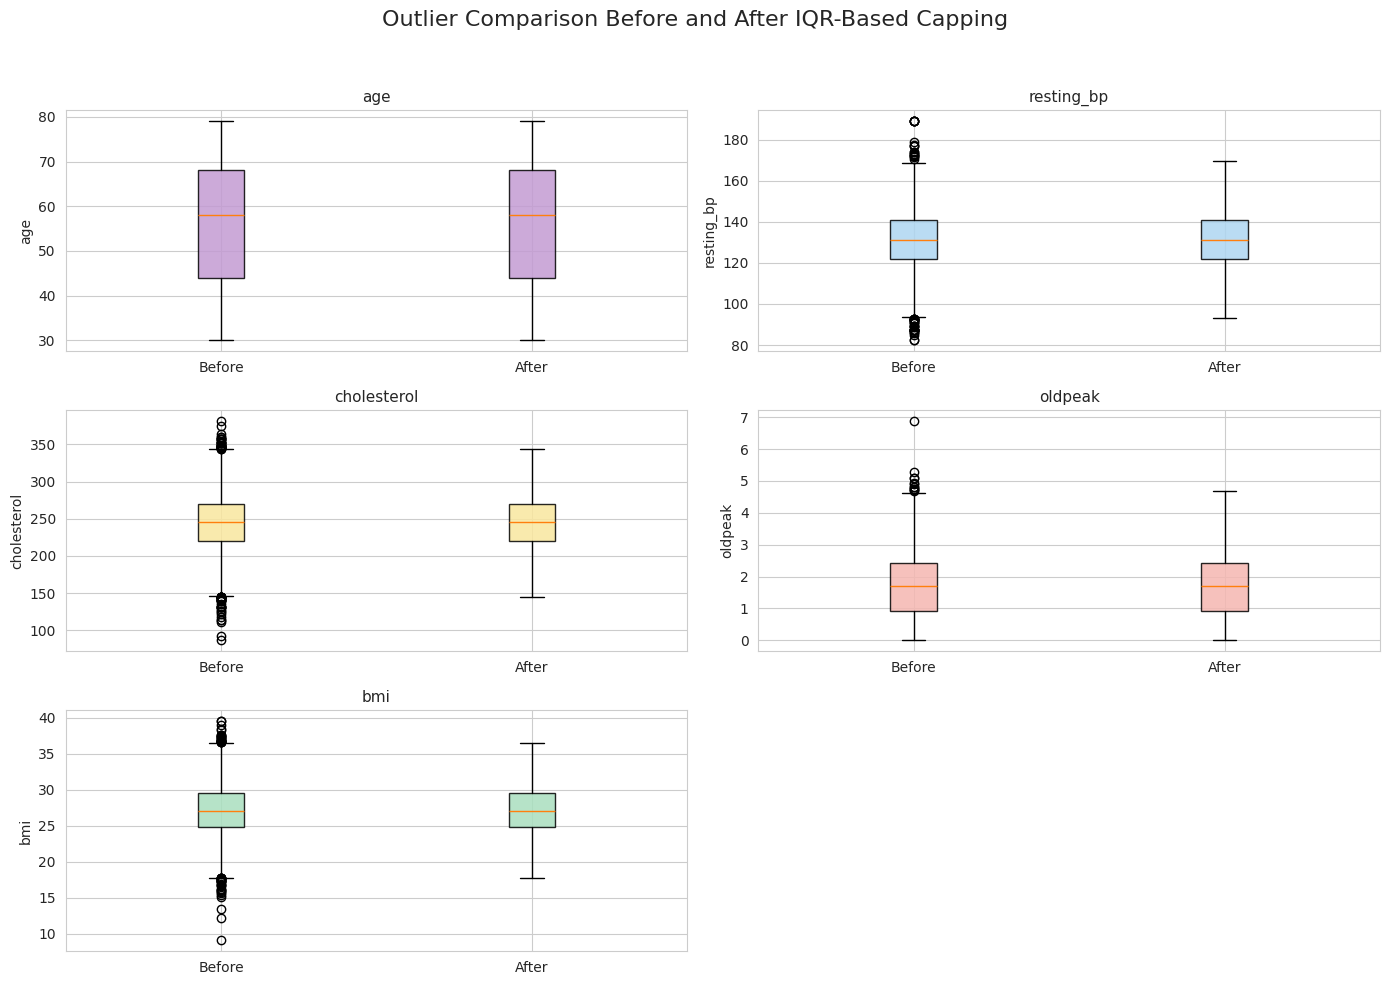

In [34]:
outlier_cols = [
    'age',
    'resting_bp',
    'cholesterol',
    'oldpeak',
    'bmi'
]

feature_colors = {
    'resting_bp': '#AED6F1',
    'cholesterol': '#F9E79F',
    'oldpeak': '#F5B7B1',
    'bmi': '#A9DFBF',
    'age': '#C39BD3'
}

# Create subplot grid
fig, axes = plt.subplots(3, 2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(outlier_cols):
    box = axes[i].boxplot(
        [
            df_before_outliers[col].dropna(),  # Before handling
            df[col].dropna()                   # After handling
        ],
        labels=['Before', 'After'],
        patch_artist=True
    )

    # Apply colors
    for patch in box['boxes']:
        patch.set_facecolor(feature_colors[col])
        patch.set_alpha(0.85)

    axes[i].set_title(f'{col}', fontsize=11)
    axes[i].set_ylabel(col)

plt.suptitle(
    'Outlier Comparison Before and After IQR-Based Capping',
    fontsize=16
)

fig.delaxes(axes[len(outlier_cols)])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# **Encoding**

In [35]:
df_encoded = df.copy()

 One-Hot Encoding

In [36]:
# Multi-class categorical columns to one-hot encode
onehot_cols = [
    'chest_pain_type',
    'rest_ecg',
    'thalassemia',
    'smoking_status'
]

# Apply One-Hot Encoding
df_encoded = pd.get_dummies(
    df_encoded,
    columns=onehot_cols,
    drop_first=False
)

print("Shape after One-Hot Encoding:", df_encoded.shape)


Shape after One-Hot Encoding: (3982, 25)


In [37]:
from sklearn.preprocessing import OrdinalEncoder

# Ordinal Encoding for 'slope'
ordinal_encoder = OrdinalEncoder(
    categories=[['upsloping', 'flat', 'downsloping']]
)

df_encoded[['slope']] = ordinal_encoder.fit_transform(
    df_encoded[['slope']]
)


In [38]:
df_encoded.head()

,age,sex,resting_bp,cholesterol,fasting_blood_sugar,exercise_angina,oldpeak,num_major_vessels,bmi,diabetes,...,chest_pain_type_typical,rest_ecg_LV hypertrophy,rest_ecg_ST-T abnormality,rest_ecg_normal,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversible defect,smoking_status_current,smoking_status_former,smoking_status_never
0,68.0,male,160.2,242.3,no,no,3.68,3.0,27.1,no,...,False,False,True,False,False,True,False,True,False,False
1,58.0,male,145.4,215.8,yes,no,2.06,0.0,30.9,yes,...,False,True,False,False,False,False,True,False,False,True
2,44.0,female,133.7,226.3,no,yes,2.87,1.0,27.1,no,...,False,False,False,True,False,True,False,False,True,False
3,72.0,male,145.7,156.6,no,no,1.17,2.0,21.3,yes,...,False,True,False,False,False,False,True,True,False,False
4,37.0,female,132.2,245.7,no,no,0.55,2.0,27.1,no,...,False,False,False,True,True,False,False,True,False,False


In [39]:
for col in ['sex', 'fasting_blood_sugar', 'exercise_angina', 'diabetes','heart_failure_risk', 'smoking_status_current',
       'smoking_status_former', 'smoking_status_never',
       'chest_pain_type_asymptomatic', 'chest_pain_type_atypical',
       'chest_pain_type_non-anginal', 'chest_pain_type_typical',
       'rest_ecg_LV hypertrophy', 'rest_ecg_ST-T abnormality',
       'rest_ecg_normal', 'slope',
       'thalassemia_fixed defect', 'thalassemia_normal',
       'thalassemia_reversible defect']:
    print(col, ":", df_encoded[col].unique())

sex : ['male' 'female']
fasting_blood_sugar : ['no' 'yes']
exercise_angina : ['no' 'yes']
diabetes : ['no' 'yes']
heart_failure_risk : ['high' 'low']
smoking_status_current : [ True False]
smoking_status_former : [False  True]
smoking_status_never : [False  True]
chest_pain_type_asymptomatic : [False  True]
chest_pain_type_atypical : [False  True]
chest_pain_type_non-anginal : [ True False]
chest_pain_type_typical : [False  True]
rest_ecg_LV hypertrophy : [False  True]
rest_ecg_ST-T abnormality : [ True False]
rest_ecg_normal : [False  True]
slope : [0. 1. 2.]
thalassemia_fixed defect : [False  True]
thalassemia_normal : [ True False]
thalassemia_reversible defect : [False  True]


Label Encoding

In [40]:
from sklearn.preprocessing import LabelEncoder

binary_cols = [
    'sex',
    'fasting_blood_sugar',
    'exercise_angina',
    'diabetes',
     'smoking_status_current',
       'smoking_status_former', 'smoking_status_never',
       'chest_pain_type_asymptomatic', 'chest_pain_type_atypical',
       'chest_pain_type_non-anginal', 'chest_pain_type_typical',
       'rest_ecg_LV hypertrophy', 'rest_ecg_ST-T abnormality',
       'rest_ecg_normal',
       'thalassemia_fixed defect', 'thalassemia_normal',
       'thalassemia_reversible defect'
]

le = LabelEncoder()

for col in binary_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

df_encoded.head()

,age,sex,resting_bp,cholesterol,fasting_blood_sugar,exercise_angina,oldpeak,num_major_vessels,bmi,diabetes,...,chest_pain_type_typical,rest_ecg_LV hypertrophy,rest_ecg_ST-T abnormality,rest_ecg_normal,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversible defect,smoking_status_current,smoking_status_former,smoking_status_never
0,68.0,1,160.2,242.3,0,0,3.68,3.0,27.1,0,...,0,0,1,0,0,1,0,1,0,0
1,58.0,1,145.4,215.8,1,0,2.06,0.0,30.9,1,...,0,1,0,0,0,0,1,0,0,1
2,44.0,0,133.7,226.3,0,1,2.87,1.0,27.1,0,...,0,0,0,1,0,1,0,0,1,0
3,72.0,1,145.7,156.6,0,0,1.17,2.0,21.3,1,...,0,1,0,0,0,0,1,1,0,0
4,37.0,0,132.2,245.7,0,0,0.55,2.0,27.1,0,...,0,0,0,1,1,0,0,1,0,0


Mapping

In [41]:
df_encoded['heart_failure_risk'] = df_encoded['heart_failure_risk'].map({
    'low': 0,
    'high': 1
})


**Key Insights**

The dataset contains both nominal and ordinal categorical variables, requiring different encoding techniques. Most categorical features such as chest pain type, rest ECG, thalassemia, and smoking status have no inherent order, so one-hot encoding was applied to prevent introducing artificial numerical relationships.

The slope feature represents a clear clinical order and was therefore encoded using ordinal encoding to preserve its meaningful progression. Binary variables such as sex, diabetes, fasting blood sugar, and exercise angina were encoded using label encoding. This encoding strategy ensures that clinical meaning is retained while making the data suitable for machine learning models.

Verifying The Encoding

In [42]:
for col in ['sex', 'fasting_blood_sugar', 'exercise_angina', 'diabetes','heart_failure_risk', 'smoking_status_current',
       'smoking_status_former', 'smoking_status_never',
       'chest_pain_type_asymptomatic', 'chest_pain_type_atypical',
       'chest_pain_type_non-anginal', 'chest_pain_type_typical',
       'rest_ecg_LV hypertrophy', 'rest_ecg_ST-T abnormality',
       'rest_ecg_normal', 'slope',
       'thalassemia_fixed defect', 'thalassemia_normal',
       'thalassemia_reversible defect']:
    print(col, ":", df_encoded[col].unique())

sex : [1 0]
fasting_blood_sugar : [0 1]
exercise_angina : [0 1]
diabetes : [0 1]
heart_failure_risk : [1 0]
smoking_status_current : [1 0]
smoking_status_former : [0 1]
smoking_status_never : [0 1]
chest_pain_type_asymptomatic : [0 1]
chest_pain_type_atypical : [0 1]
chest_pain_type_non-anginal : [1 0]
chest_pain_type_typical : [0 1]
rest_ecg_LV hypertrophy : [0 1]
rest_ecg_ST-T abnormality : [1 0]
rest_ecg_normal : [0 1]
slope : [0. 1. 2.]
thalassemia_fixed defect : [0 1]
thalassemia_normal : [1 0]
thalassemia_reversible defect : [0 1]


In [43]:
df_encoded.shape

(3982, 25)

In [44]:
df_encoded.columns


Index(['age', 'sex', 'resting_bp', 'cholesterol', 'fasting_blood_sugar',
       'exercise_angina', 'oldpeak', 'num_major_vessels', 'bmi', 'diabetes',
       'slope', 'heart_failure_risk', 'chest_pain_type_asymptomatic',
       'chest_pain_type_atypical', 'chest_pain_type_non-anginal',
       'chest_pain_type_typical', 'rest_ecg_LV hypertrophy',
       'rest_ecg_ST-T abnormality', 'rest_ecg_normal',
       'thalassemia_fixed defect', 'thalassemia_normal',
       'thalassemia_reversible defect', 'smoking_status_current',
       'smoking_status_former', 'smoking_status_never'],
      dtype='object')

# **Download The Dataset**

In [45]:
df_encoded.to_csv("heart_failure_final_dataset.csv", index=False)

# **Feature Scaling**

In [47]:
from sklearn.preprocessing import StandardScaler

df_scaled = df_encoded.copy()

# Numerical columns to scale
scale_cols = [
    'age',
    'resting_bp',
    'cholesterol',
    'oldpeak',
    'bmi',
    'num_major_vessels'
]

scaler = StandardScaler()
df_scaled[scale_cols] = scaler.fit_transform(df_scaled[scale_cols])

print("Scaling applied to numerical features:")
print(scale_cols)
print("\nShape of scaled dataset:", df_scaled.shape)


Scaling applied to numerical features:
['age', 'resting_bp', 'cholesterol', 'oldpeak', 'bmi', 'num_major_vessels']

Shape of scaled dataset: (3982, 25)


In [48]:
df_scaled.dtypes

,0
age,float64
sex,int64
resting_bp,float64
cholesterol,float64
fasting_blood_sugar,int64
exercise_angina,int64
oldpeak,float64
num_major_vessels,float64
bmi,float64
diabetes,int64


In [49]:
df_scaled.describe().round(5)

,age,sex,resting_bp,cholesterol,fasting_blood_sugar,exercise_angina,oldpeak,num_major_vessels,bmi,diabetes,...,chest_pain_type_typical,rest_ecg_LV hypertrophy,rest_ecg_ST-T abnormality,rest_ecg_normal,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversible defect,smoking_status_current,smoking_status_former,smoking_status_never
count,3982.00000,3982.00000,3982.00000,3982.00000,3982.00000,3982.00000,3982.00000,3982.00000,3982.00000,3982.00000,...,3982.00000,3982.00000,3982.00000,3982.00000,3982.00000,3982.00000,3982.00000,3982.00000,3982.00000,3982.00000
mean,0.00000,0.51833,-0.00000,0.00000,0.53566,0.57911,-0.00000,0.00000,0.00000,0.44852,...,0.23782,0.33325,0.34304,0.32371,0.37494,0.31291,0.31215,0.31944,0.30989,0.37067
std,1.00013,0.49973,1.00013,1.00013,0.49879,0.49376,1.00013,1.00013,1.00013,0.49741,...,0.42580,0.47143,0.47479,0.46795,0.48417,0.46374,0.46343,0.46632,0.46251,0.48304
min,-1.84418,0.00000,-2.56970,-2.56257,0.00000,0.00000,-1.71693,-1.58708,-2.55017,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,-0.86238,0.00000,-0.62218,-0.64042,0.00000,0.00000,-0.80864,-0.60208,-0.62688,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,0.11942,1.00000,0.00999,0.02840,1.00000,1.00000,-0.04844,0.38292,0.00058,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
75%,0.82071,1.00000,0.67616,0.64101,1.00000,1.00000,0.67227,0.38292,0.65531,1.00000,...,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000
max,1.59212,1.00000,2.62367,2.56316,1.00000,1.00000,2.89363,1.36792,2.57860,1.00000,...,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


**Key Insights**

Feature scaling was applied to numerical variables to ensure that all features contribute equally during model training. Since the dataset contains features with different ranges, such as age, blood pressure, cholesterol, and BMI, scaling prevents variables with larger magnitudes from dominating the learning process. Standardization was chosen to center features around a common scale while preserving relative differences. This improves model stability, convergence, and overall performance, especially when combining multiple clinical measurements.

# **Model Training**

Feature Explanations

**Accuracy**

* Accuracy measures the overall correctness of the model by calculating the proportion of total predictions that are correct.

* Accuracy is the ratio of correctly predicted observations to the total number of observations.

**Precision**

* Precision measures how many of the instances predicted as positive are actually positive.

* Precision is the proportion of true positive predictions among all positive predictions made by the model.

**Recall (Sensitivity)**

* Recall measures how well the model identifies actual positive cases.

* Recall is the proportion of actual positive cases that were correctly identified by the model

**F1 Score**

* F1 Score is the harmonic mean of precision and recall, balancing both metrics.

* F1 Score provides a single measure of model performance when there is an imbalance between classes.

**ROC–AUC (Receiver Operating Characteristic – Area Under Curve)**

* ROC–AUC evaluates how well the model distinguishes between classes across all classification thresholds.

* ROC–AUC represents the probability that the model ranks a randomly chosen positive instance higher than a randomly chosen negative one.


Logistic Regression

In [50]:
from sklearn.model_selection import train_test_split

# Features and target
X = df_scaled.drop('heart_failure_risk', axis=1)
y = df_scaled['heart_failure_risk']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (3185, 24)
Testing set shape: (797, 24)


In [51]:
from sklearn.linear_model import LogisticRegression

# Initialize model
log_reg = LogisticRegression(max_iter=1000)

# Train model
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [52]:
# Predictions
y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)


In [53]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.7854454203262233

Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.78      0.79       420
           1       0.76      0.79      0.78       377

    accuracy                           0.79       797
   macro avg       0.79      0.79      0.79       797
weighted avg       0.79      0.79      0.79       797



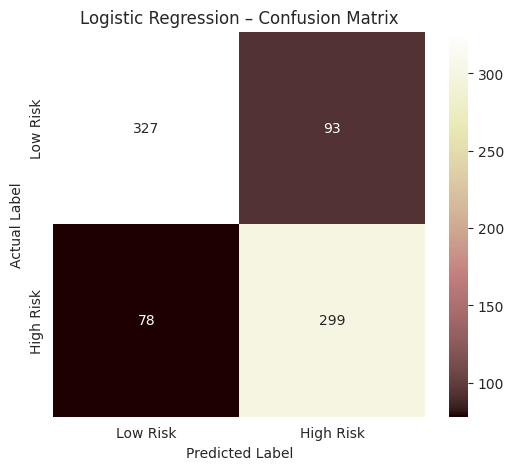

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix for Logistic Regression
cm_log_reg = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm_log_reg, # Pass the confusion matrix
    annot=True,
    fmt='d',
    cmap='pink',
    xticklabels=['Low Risk', 'High Risk'],
    yticklabels=['Low Risk', 'High Risk']
)

plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Logistic Regression – Confusion Matrix")
plt.show()

Decision Tree

In [55]:
from sklearn.model_selection import train_test_split

X = df_scaled.drop('heart_failure_risk', axis=1)
y = df_scaled['heart_failure_risk']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [56]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [57]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", round(accuracy * 100, 2), "%")

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Decision Tree Accuracy: 93.35 %

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.94       420
           1       0.96      0.90      0.93       377

    accuracy                           0.93       797
   macro avg       0.94      0.93      0.93       797
weighted avg       0.93      0.93      0.93       797


Confusion Matrix:
 [[405  15]
 [ 38 339]]


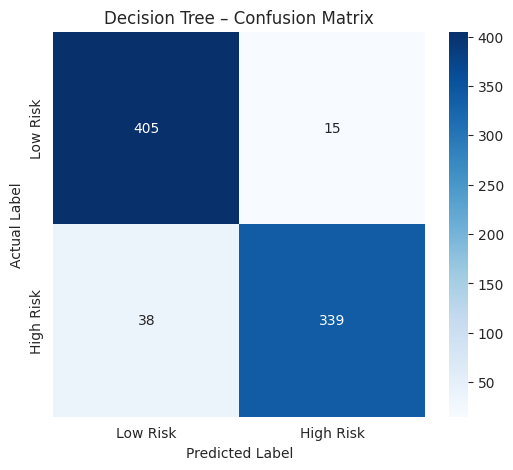

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix for Decision Tree
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Low Risk', 'High Risk'],
    yticklabels=['Low Risk', 'High Risk']
)

plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Decision Tree – Confusion Matrix")
plt.show()

Random Forest

In [59]:
from sklearn.model_selection import train_test_split

X = df_scaled.drop('heart_failure_risk', axis=1)
y = df_scaled['heart_failure_risk']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [60]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=8, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [61]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", round(accuracy_rf * 100, 2), "%")

print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 95.61 %

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       420
           1       0.97      0.94      0.95       377

    accuracy                           0.96       797
   macro avg       0.96      0.96      0.96       797
weighted avg       0.96      0.96      0.96       797



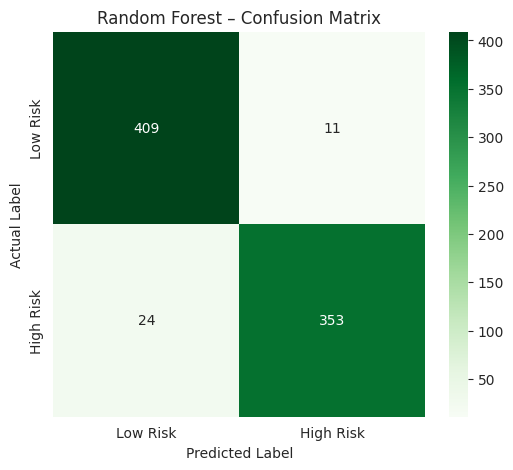

In [62]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm_rf,
    annot=True,
    fmt='d',
    cmap='Greens',
    xticklabels=['Low Risk', 'High Risk'],
    yticklabels=['Low Risk', 'High Risk']
)

plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Random Forest – Confusion Matrix")
plt.show()


In [63]:
from sklearn.metrics import roc_auc_score

y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

print("Random Forest ROC-AUC:", round(roc_auc_rf, 3))


Random Forest ROC-AUC: 0.988


In [64]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

single_tree = rf_model.estimators_[0]


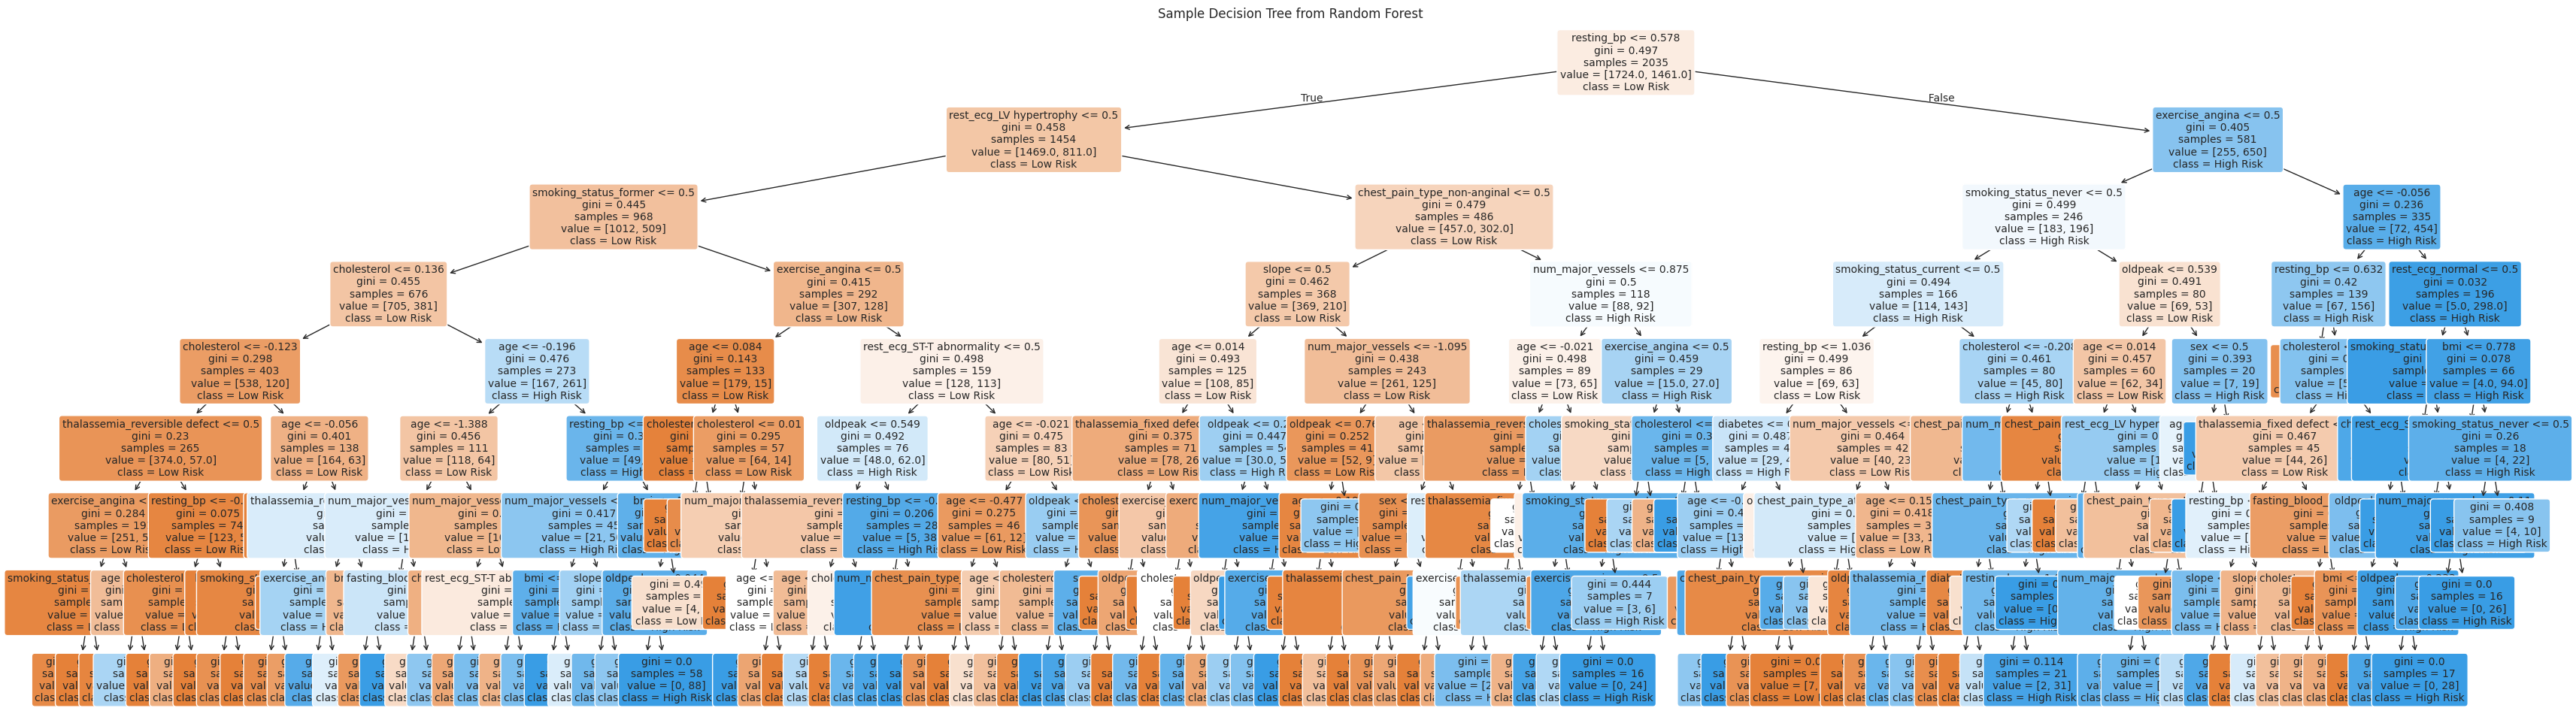

In [65]:
plt.figure(figsize=(42, 12))

plot_tree(
    single_tree,
    feature_names=X.columns,
    class_names=["Low Risk", "High Risk"],
    filled=True,
    rounded=True,
    fontsize=10
)

plt.title("Sample Decision Tree from Random Forest")
plt.show()


XG Boost

In [66]:
from sklearn.model_selection import train_test_split

X = df_scaled.drop('heart_failure_risk', axis=1)
y = df_scaled['heart_failure_risk']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [67]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=-1,
              num_parallel_tree=None, ...)

In [68]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_xgb = xgb_model.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", round(accuracy_xgb * 100, 2), "%")

print("\nClassification Report:\n",
      classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 95.61 %

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       420
           1       0.95      0.96      0.95       377

    accuracy                           0.96       797
   macro avg       0.96      0.96      0.96       797
weighted avg       0.96      0.96      0.96       797



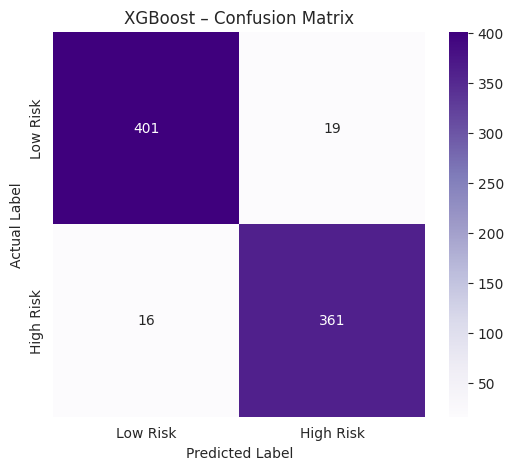

In [69]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm_xgb,
    annot=True,
    fmt='d',
    cmap='Purples',
    xticklabels=['Low Risk', 'High Risk'],
    yticklabels=['Low Risk', 'High Risk']
)

plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("XGBoost – Confusion Matrix")
plt.show()


In [70]:
from sklearn.metrics import roc_auc_score

y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)

print("XGBoost ROC-AUC:", round(roc_auc_xgb, 3))


XGBoost ROC-AUC: 0.989


In [71]:
import pandas as pd

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance.head(10))


                          Feature  Importance
0                             age    0.214540
6                         oldpeak    0.180999
3                     cholesterol    0.176707
2                      resting_bp    0.153716
5                 exercise_angina    0.148169
8                             bmi    0.034553
7               num_major_vessels    0.010511
10                          slope    0.008753
1                             sex    0.005522
20  thalassemia_reversible defect    0.005335


# **Inference**

In [74]:
new_patient = pd.DataFrame({
    'age': [50],
    'sex': ['male'],
    'resting_bp': [145],
    'cholesterol': [220],
    'fasting_blood_sugar': ['yes'],
    'exercise_angina': ['yes'],
    'oldpeak': [4.2],
    'num_major_vessels': [1],
    'bmi': [36.5],
    'diabetes': ['no'],
    'chest_pain_type': ['asymptomatic'],
    'rest_ecg': ['st-t abnormality'],
    'slope': ['flat'],
    'thalassemia': ['reversible defect'],
    'smoking_status': ['never']
})

binary_maps = {
    'sex': {'male': 1, 'm': 1, 'female': 0, 'f': 0},
    'exercise_angina': {'yes': 1, 'y': 1, 'no': 0, 'n': 0},
    'fasting_blood_sugar': {'yes': 1, '1': 1, 'no': 0, '0': 0},
    'diabetes': {'yes': 1, '1': 1, 'no': 0, '0': 0}
}

for col, mapping in binary_maps.items():
    new_patient[col] = (
        new_patient[col]
        .astype(str)
        .str.strip()
        .str.lower()
        .map(mapping)
    )

categorical_cols = [
    'chest_pain_type',
    'rest_ecg',
    'slope',
    'thalassemia',
    'smoking_status'
]

new_patient_encoded = pd.get_dummies(
    new_patient,
    columns=categorical_cols,
    drop_first=False
)

# Ensure same feature columns as training data
new_patient_encoded = new_patient_encoded.reindex(
    columns=X.columns,
    fill_value=0
)

numeric_cols = [
    'age',
    'resting_bp',
    'cholesterol',
    'oldpeak',
    'bmi',
    'num_major_vessels'
]

new_patient_encoded[numeric_cols] = scaler.transform(
    new_patient_encoded[numeric_cols]
)

probability = log_reg.predict_proba(new_patient_encoded)[:, 1][0]
prediction = log_reg.predict(new_patient_encoded)[0]

print("Predicted Probability of Heart Failure Risk:", round(probability, 2))
print("Predicted Class (0 = Low Risk, 1 = High Risk):", prediction)


Predicted Probability of Heart Failure Risk: 0.97
Predicted Class (0 = Low Risk, 1 = High Risk): 1


# **Model Comparision**

In [75]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

models = {
    "Logistic Regression": log_reg,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob)
    })

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.785445,0.762755,0.793103,0.777633,0.888405
1,Decision Tree,0.933501,0.957627,0.899204,0.927497,0.957118
2,Random Forest,0.956085,0.969780,0.936340,0.952767,0.987584
3,XGBoost,0.956085,0.950000,0.957560,0.953765,0.988746


In [76]:
results_df.style.format({
    "Accuracy": "{:.2%}",
    "Precision": "{:.2%}",
    "Recall": "{:.2%}",
    "F1-Score": "{:.2%}",
    "ROC-AUC": "{:.3f}"
})


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,78.54%,76.28%,79.31%,77.76%,0.888
1,Decision Tree,93.35%,95.76%,89.92%,92.75%,0.957
2,Random Forest,95.61%,96.98%,93.63%,95.28%,0.988
3,XGBoost,95.61%,95.00%,95.76%,95.38%,0.989


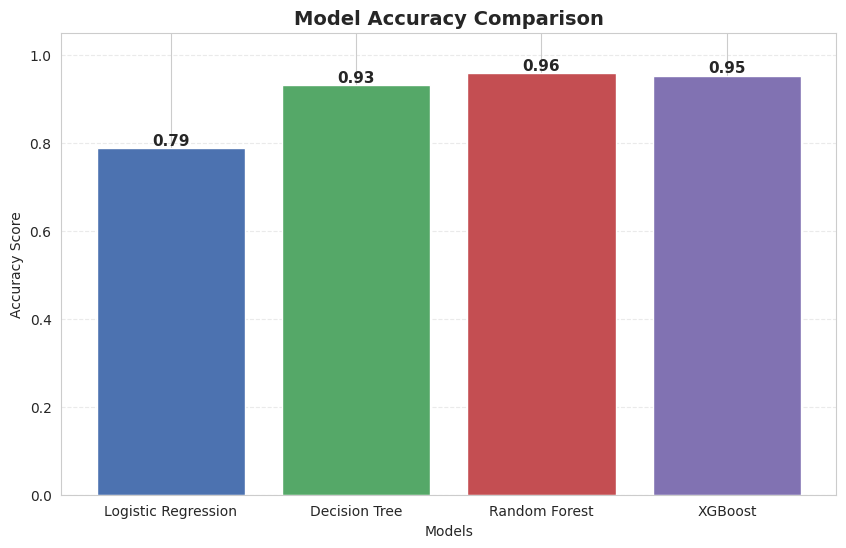

In [77]:
models = [
    'Logistic Regression',
    'Decision Tree',
    'Random Forest',
    'XGBoost'
]

accuracy_scores = [
    0.788,
    0.931,
    0.958,
    0.952
]

# Create bar plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar( # Call bar on the axes object
    models,
    accuracy_scores,
    color=['#4C72B0', '#55A868', '#C44E52', '#8172B2']
)

# Add accuracy values on top of bars
for bar_obj in bars:                                    # Use a different variable name for the loop to avoid conflict with `bar` for `plt.bar`
    height = bar_obj.get_height()
    ax.text(                                            # Call text on the axes object
        bar_obj.get_x() + bar_obj.get_width() / 2,
        height,
        f'{height:.2f}',
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='bold'
    )

# Labels and title
ax.set_ylim(0, 1.05)
ax.set_ylabel('Accuracy Score')
ax.set_xlabel('Models')
ax.set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold')

ax.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()


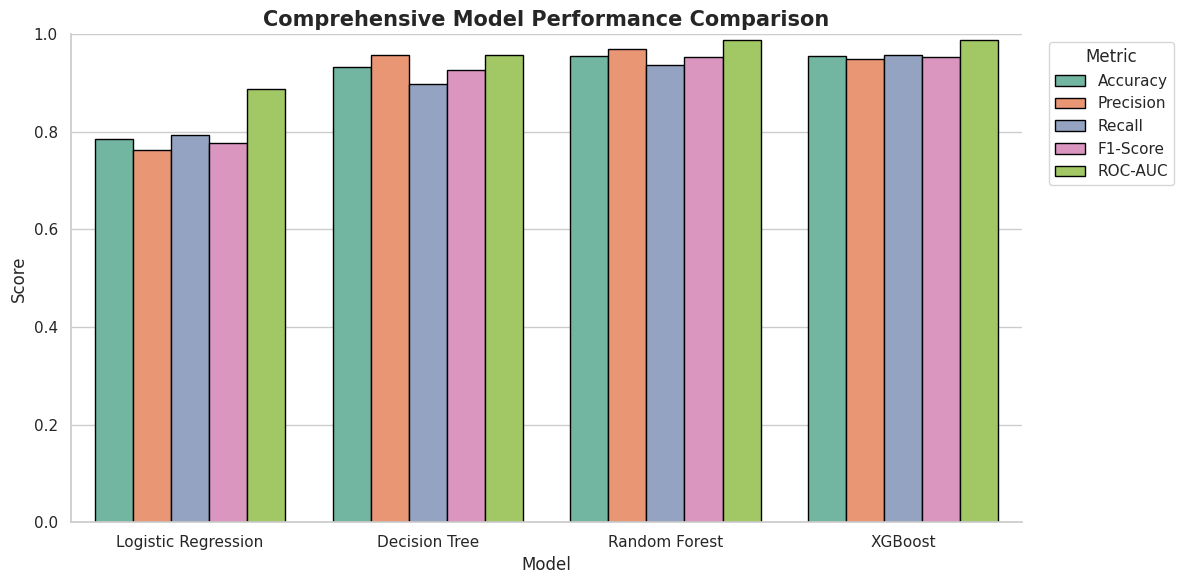

In [78]:
sns.set_theme(style="whitegrid", palette="Set2")

plt.figure(figsize=(12, 6))

metrics_long = results_df.melt(
    id_vars="Model",
    var_name="Metric",
    value_name="Score"
)

sns.barplot(
    data=metrics_long,
    x="Model",
    y="Score",
    hue="Metric",
    edgecolor="black"
)

plt.title("Comprehensive Model Performance Comparison", fontsize=15, weight="bold")
plt.ylabel("Score")
plt.xlabel("Model")
plt.ylim(0, 1)

plt.legend(
    title="Metric",
    bbox_to_anchor=(1.02, 1),
    loc="upper left"
)

sns.despine()
plt.tight_layout()
plt.show()

In [79]:
best_model = results_df.loc[results_df["ROC-AUC"].idxmax(), "Model"]
print(f"Best performing model based on ROC-AUC: {best_model}")


Best performing model based on ROC-AUC: XGBoost


**Model Selection Justification**

ROC–AUC was used as the primary evaluation metric because it measures the model’s ability to distinguish between high-risk and low-risk patients across all decision thresholds, making it more reliable than accuracy for moderately imbalanced medical datasets. Since the goal of the project is risk estimation rather than simple classification, ROC–AUC provides a more meaningful assessment of model performance.

XGBoost was selected as the final model because it demonstrated the highest ROC–AUC score among the evaluated models and is well-suited for structured clinical data. Its ability to capture non-linear relationships, handle class imbalance, and produce robust probability-based predictions makes it particularly effective for heart failure risk assessment.

# **Save The Model**

In [80]:
import joblib

model_artifacts = {
    "model": xgb_model,
    "scaler": scaler,
    "features": X.columns.tolist()
}

joblib.dump(model_artifacts, "heart_failure_xgboost_project.pkl")

['heart_failure_xgboost_project.pkl']

# **Final Conclusion**

This project presents a comprehensive Heart Failure Risk Prediction System that combines clinical data, machine learning, and an interactive deployment framework. By leveraging an XGBoost-based model and probability-driven predictions, the system effectively captures complex relationships among cardiovascular risk factors while remaining robust to data imbalance. The solution is designed as a clinical decision-support tool, offering meaningful risk insights rather than absolute diagnoses. Overall, the project demonstrates how machine learning can be responsibly applied in healthcare to support early risk identification, interpretability, and informed decision-making, while acknowledging practical limitations and scope for future enhancement.